# Vehicle Testing NI - Analysis

In [2]:
# import the usual suspects
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [60]:
# Get original DF
df = pd.read_csv('vehicletestingoutcomes2018-19.csv')

## Lets Take a Looksy

In [4]:
df

,TestCentre,TestDetails,All Tests,AllFullTests,AllRetests,CarsFullTests,CarsRetests,TaxisFullTests,TaxisRetests,HGVFullTests,HGVRetests
0,Armagh,Conducted,5.387400e+04,47505.000000,6369.000000,39060.000000,4801.000000,205.000000,37.000000,1892.000000,523.000000
1,Armagh,Pass,4.386100e+04,37888.000000,5973.000000,31133.000000,4516.000000,154.000000,35.000000,1472.000000,477.000000
2,Armagh,Fail,1.001300e+04,9617.000000,396.000000,7927.000000,285.000000,51.000000,2.000000,420.000000,46.000000
3,Armagh,Pass %,8.141404e-01,0.797558,0.937824,0.797056,0.940637,0.751220,0.945946,0.778013,0.912046
4,Ballymena,Conducted,8.083100e+04,66979.000000,13852.000000,54819.000000,11488.000000,566.000000,103.000000,1635.000000,379.000000
5,Ballymena,Pass,6.740700e+04,54427.000000,12980.000000,44514.000000,10772.000000,470.000000,96.000000,1270.000000,354.000000
6,Ballymena,Fail,1.342400e+04,12552.000000,872.000000,10305.000000,716.000000,96.000000,7.000000,365.000000,25.000000
7,Ballymena,Pass %,8.339251e-01,0.812598,0.937049,0.812018,0.937674,0.830389,0.932039,0.776758,0.934037
8,Belfast (Balmoral),Conducted,1.037720e+05,88816.000000,14956.000000,75112.000000,12738.000000,2335.000000,577.000000,1922.000000,278.000000
9,Belfast (Balmoral),Pass,8.961000e+04,75418.000000,14192.000000,63850.000000,12128.000000,1885.000000,543.000000,1617.000000,254.000000


Notes:
- For each test centre, 4 rows: conducted, pass, fail, pass % 
- Three rows on the tail df[-3] for overall ... pass, fail, pass % 

In [5]:
df.describe()

,All Tests,AllFullTests,AllRetests,CarsFullTests,CarsRetests,TaxisFullTests,TaxisRetests,HGVFullTests,HGVRetests
count,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,6.810583e+04,57705.890208,10400.172954,48296.452846,8651.798677,542.757197,121.358430,1587.502918,357.354081
std,1.735571e+05,145809.313890,27964.852442,122117.119975,23305.800748,1407.468953,337.749611,3973.734880,951.311804
min,7.915804e-01,0.765709,0.931887,0.762431,0.935727,0.698925,0.857143,0.655629,0.877976
25%,5.864466e+03,5475.212287,297.238634,4413.212516,213.990174,27.962560,1.741279,120.211776,7.736442
50%,3.765000e+04,30648.000000,6171.000000,26111.500000,4658.500000,147.500000,35.500000,619.000000,116.000000
75%,6.818700e+04,57808.000000,10355.000000,47455.000000,8769.000000,319.000000,83.250000,1390.250000,345.750000
max,1.089690e+06,923291.000000,166399.000000,772740.000000,138425.000000,8681.000000,1938.000000,25397.000000,5714.000000


Notes:

- This does not add much value due to the structure of the data, where each row is not an observation, but rather a set of up to 4 differing versions of the columnar data.

In [6]:
pandas_profiling.ProfileReport(df)

Number of variables,11
Number of observations,64
Total Missing (%),0.0%
Total size in memory,5.6 KiB
Average record size in memory,89.2 B
Numeric,1
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,8


Notes:
- no missing data
- Columns jave very expected correlations, Full tests having a relationship wth re-testing - meaning across the 64 rows the numerical variable information tends to follow the same trends (obvious enough, due to it really being a reflection of population).

In [7]:
def bar_plot(x,y):
    plt.xticks(rotation=90)
    plt.bar(x,y)

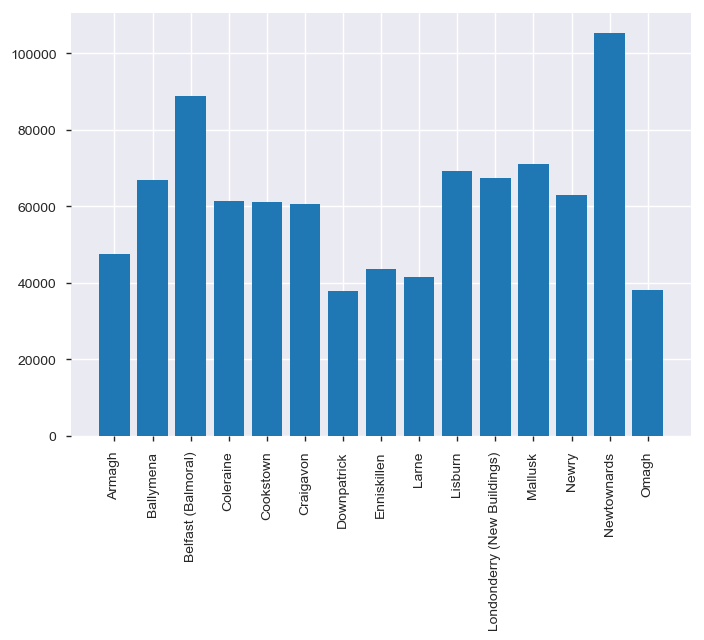

In [8]:
# Plot Distribution of Test Centre Total Conducted Tests
x = df['TestCentre'].unique()
y = df[df['TestDetails'] == 'Conducted']['AllFullTests']
x = x[:-1]; y=y[:-1] # Drop the 'Overall' Value 

bar_plot(x,y)

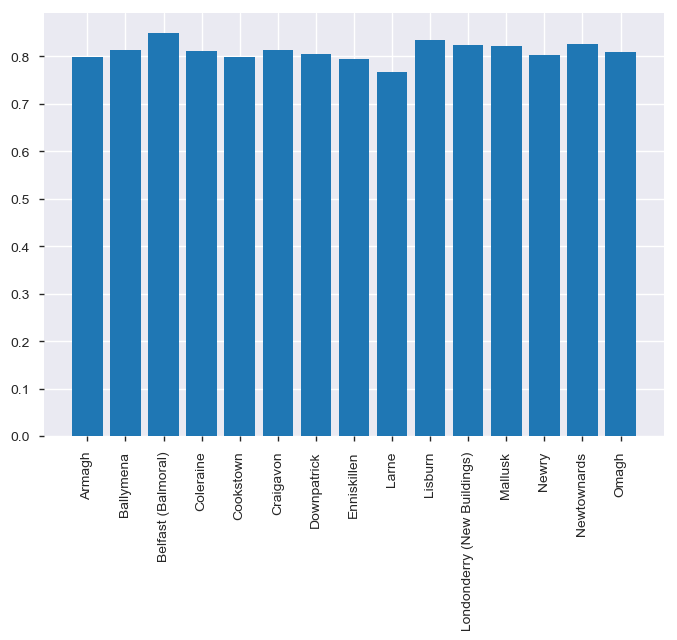

In [9]:
# Plot pass rates across test Centres
x = df['TestCentre'].unique()
y = df[df['TestDetails'] == 'Pass %']['AllFullTests']
x = x[:-1]; y = y[:-1]

bar_plot(x,y)

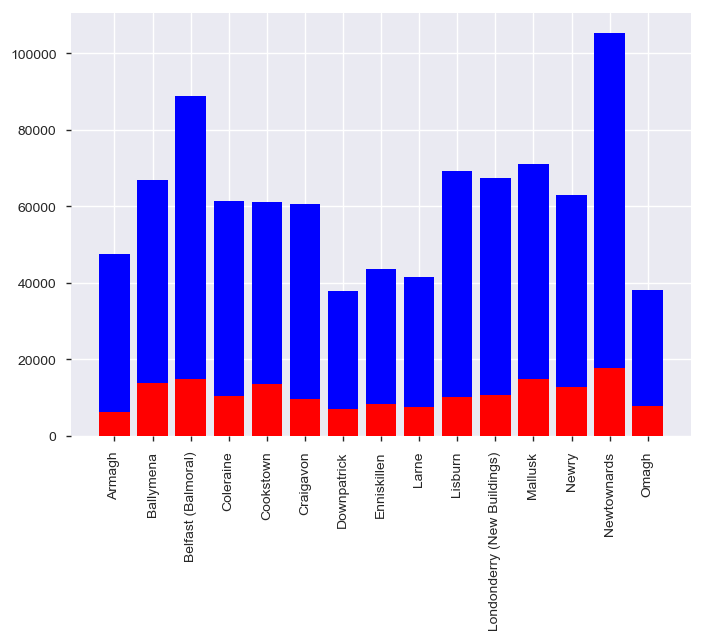

In [10]:
x = df['TestCentre'].unique()
y_test = df[df['TestDetails'] == 'Conducted']['AllFullTests']
y_retest = df[df['TestDetails'] == 'Conducted']['AllRetests']
x = x[:-1]; y_test = y_test[:-1]; y_retest = y_retest[:-1]

plt.bar(x, y_test, color = 'b')
plt.bar(x, y_retest, color = 'r')
plt.xticks(rotation=90)
plt.show()

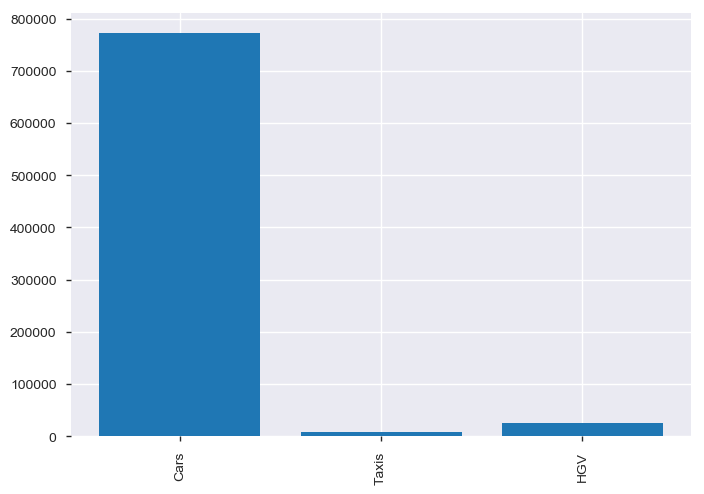

In [11]:
# What is the distribution of tests across vehicle types.

y_vehicle_type_counts = np.arange(3)
x_vehicle_type_counts = ['Cars', 'Taxis', 'HGV']

y_vehicle_type_counts[0] = df[(df['TestDetails'] == 'Conducted') & (df['TestCentre'] == 'Overall')]['CarsFullTests']
y_vehicle_type_counts[1] = df[(df['TestDetails'] == 'Conducted') & (df['TestCentre'] == 'Overall')]['TaxisFullTests']
y_vehicle_type_counts[2] = df[(df['TestDetails'] == 'Conducted') & (df['TestCentre'] == 'Overall')]['HGVFullTests']

bar_plot(x_vehicle_type_counts, y_vehicle_type_counts)

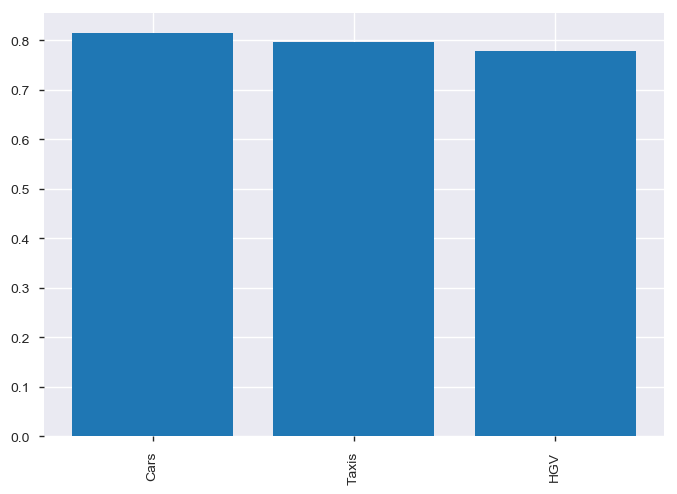

In [12]:
# Differing pass rates for each type of vehicle

y_vehicle_type_counts = np.arange(3.0)
x_vehicle_type_counts = ['Cars', 'Taxis', 'HGV']

y_vehicle_type_counts[0] = df[(df['TestDetails'] == 'Pass %') & (df['TestCentre'] == 'Overall')]['CarsFullTests']
y_vehicle_type_counts[1] = df[(df['TestDetails'] == 'Pass %') & (df['TestCentre'] == 'Overall')]['TaxisFullTests']
y_vehicle_type_counts[2] = df[(df['TestDetails'] == 'Pass %') & (df['TestCentre'] == 'Overall')]['HGVFullTests']

bar_plot(x_vehicle_type_counts, y_vehicle_type_counts)

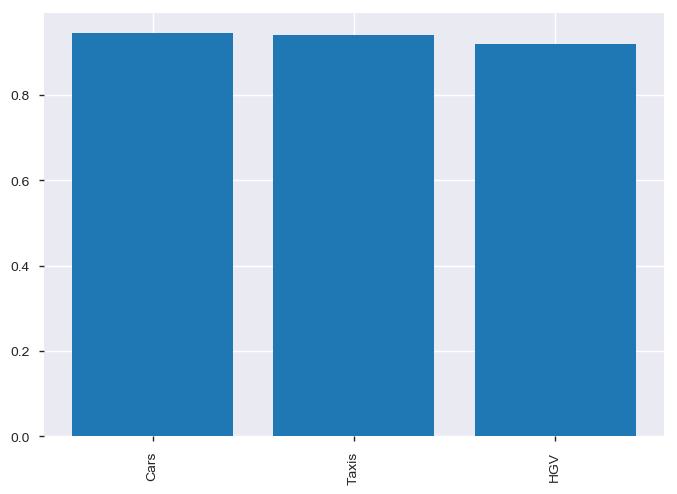

In [13]:
# Retesting pass rate for each type of vehicle

y_vehicle_type_counts = np.arange(3.0)
x_vehicle_type_counts = ['Cars', 'Taxis', 'HGV']

y_vehicle_type_counts[0] = df[(df['TestDetails'] == 'Pass %') & (df['TestCentre'] == 'Overall')]['CarsRetests']
y_vehicle_type_counts[1] = df[(df['TestDetails'] == 'Pass %') & (df['TestCentre'] == 'Overall')]['TaxisRetests']
y_vehicle_type_counts[2] = df[(df['TestDetails'] == 'Pass %') & (df['TestCentre'] == 'Overall')]['HGVRetests']

bar_plot(x_vehicle_type_counts, y_vehicle_type_counts)

# Plot Location of Centres & Intensity of Volume

In [70]:
# Rename derry to something sensible

indices = df[df['TestCentre'] == 'Londonderry (New Buildings)'].index

for i in indices: 
    df.loc[i,'TestCentre'] = 'Derry Northern Ireland'

In [71]:
# remove 'Overall'
df_strip_overall = df[:-4]

# Get Coordinate Information
geolocator = Nominatim(user_agent="vehicle-testing")

# Need to filter the data by unique test centre (not overall), then total tests for all vehicles as a series
df_strip_overall = df_strip_overall[(df_strip_overall['TestDetails'] == 'Conducted')]

# Get list of test centres
test_centres = df_strip_overall["TestCentre"]

# Traverse the list of centres to get lat long
lat = []
long = []
for s in test_centres:
    location = geolocator.geocode(s)

    lat.append(location.latitude)
    long.append(location.longitude)

# Add new column with coordinate information for each Test Centre Location
df_strip_overall['lat'] = lat
df_strip_overall['long'] = long

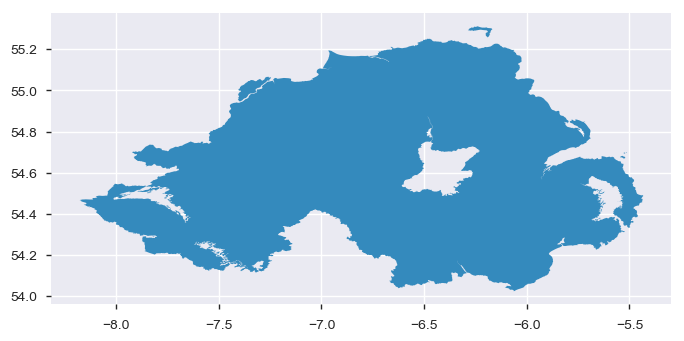

In [72]:
# get shape file for NI
ni_map = gpd.read_file('shape-files/OSNI_Open_Data_Largescale_Boundaries__NI_Outline.shp')
ni_map.plot()

In [95]:
# convert lat / long to points
geometry = [Point(xy) for xy in zip(df_strip_overall['long'], df_strip_overall['lat'])]

# define crs
crs = {'init' : 'epsg:4326'}

# geo DF
geo_df = gpd.GeoDataFrame(df_strip_overall, crs=crs, geometry=geometry)

geo_df.sample(5)

,TestCentre,TestDetails,All Tests,AllFullTests,AllRetests,CarsFullTests,CarsRetests,TaxisFullTests,TaxisRetests,HGVFullTests,HGVRetests,lat,long,geometry
12,Coleraine,Conducted,71762.0,61269.0,10493.0,52300.0,8888.0,276.0,61.0,1312.0,343.0,55.131591,-6.671861,POINT (-6.671861 55.1315912)
32,Larne,Conducted,49242.0,41649.0,7593.0,36461.0,6654.0,175.0,39.0,794.0,121.0,54.850846,-5.818312,POINT (-5.8183116 54.8508458)
28,Enniskillen,Conducted,51829.0,43528.0,8301.0,35823.0,6768.0,161.0,42.0,1198.0,336.0,54.344854,-7.638936,POINT (-7.6389365 54.3448538)
48,Newry,Conducted,75974.0,63048.0,12926.0,51577.0,10366.0,308.0,90.0,2712.0,756.0,54.177528,-6.337506,POINT (-6.337506 54.1775283)
16,Cookstown,Conducted,74584.0,61066.0,13518.0,49706.0,11017.0,183.0,57.0,2111.0,469.0,54.643673,-6.741601,POINT (-6.7416008 54.6436734)


Text(0.5,1,'Plot of locations of test centres in NI')

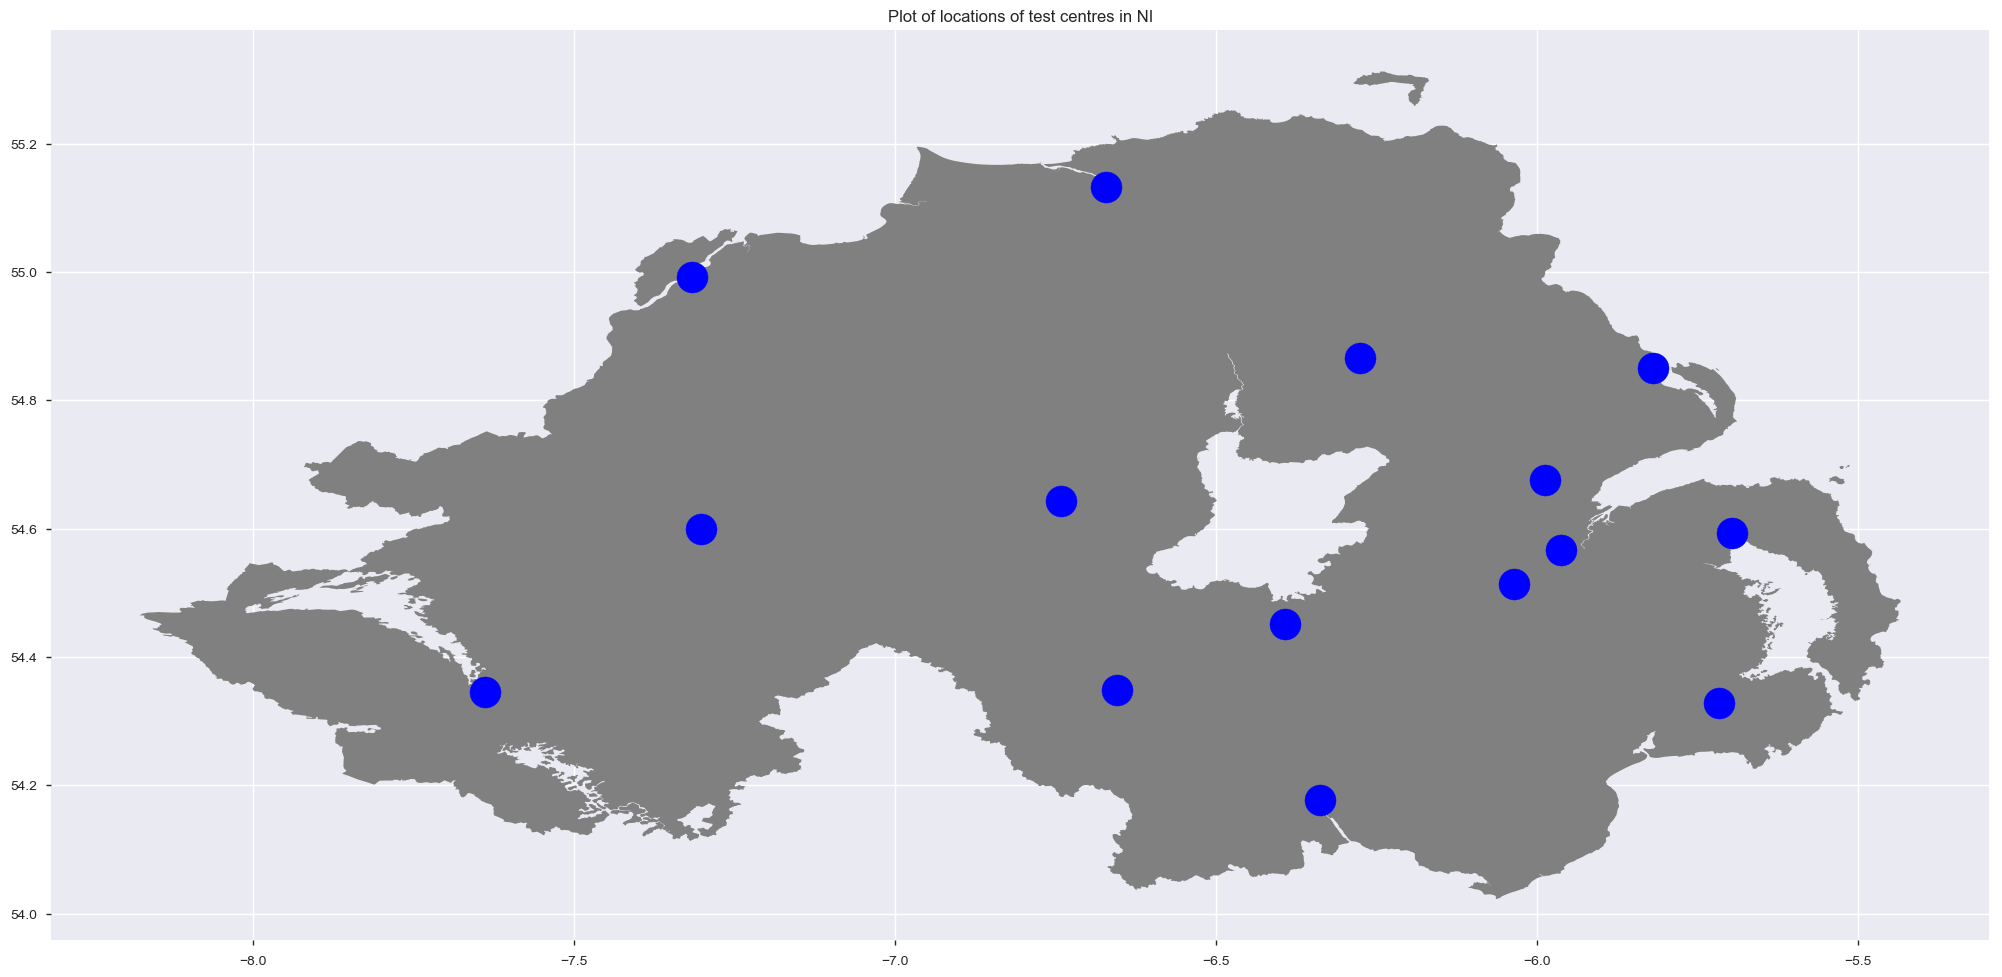

In [76]:
# Plot Locations
fig, ax = plt.subplots(1, figsize=(25,25))

base = ni_map.plot(ax=ax, color='gray')
geo_df.plot(ax=base, marker="o", markersize=500, color='blue')
ax.set_title("Plot of locations of test centres in NI")

Text(0.5,1,'Plot of locations of test centres in NI')

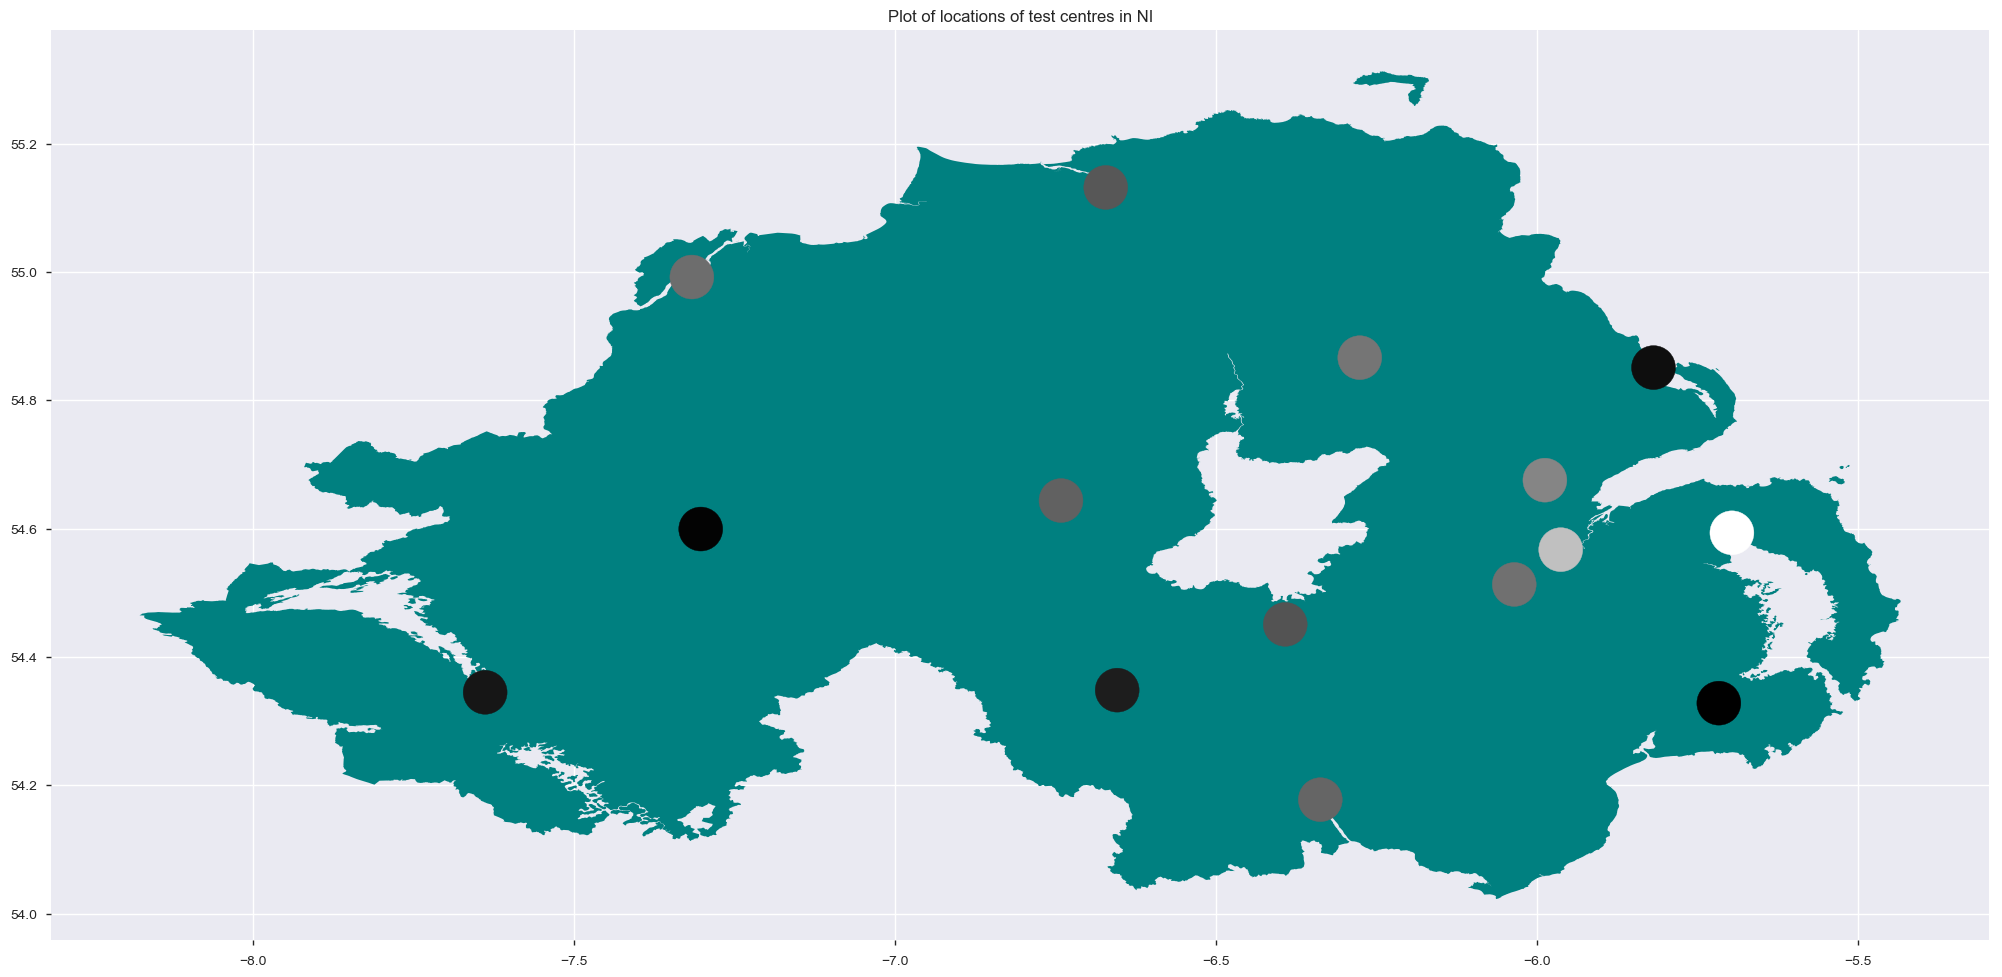

In [94]:
# Plot Locations with Intensity of Volume
fig, ax = plt.subplots(1, figsize=(25,25))

base = ni_map.plot(ax=ax, color='teal')
geo_df.plot(ax=base, marker="o", markersize=1000, c=geo_df['All Tests'])
ax.set_title("Plot of locations of test centres in NI")

## Buffer Pane

IDEAS: 
- Plot test volumes over time? animated graph?
- Merge with the prior four years worth of data
- Can I expand counts into rows; label with outcome, then try to model? any value in this?
- Can I apply to accident statistics in a given area? is the testing adequate?